In [3]:
# Importing Libraries
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_top_count = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_top_count

[]

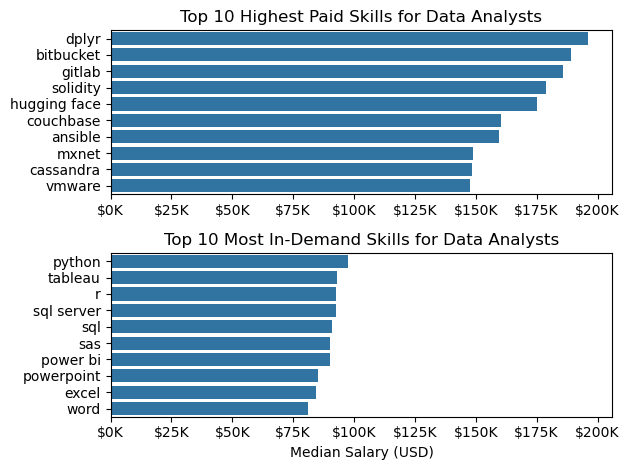

In [6]:
fig, ax = plt.subplots(2, 1)

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
fig.legends


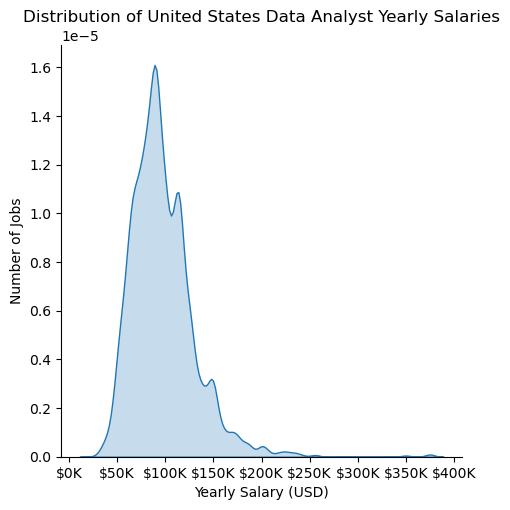

In [7]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()
